# Predicting the 2020 Presidential Election

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

from data_dicts import PERCENT_FEATURES, COUNT_FEATURES
from data_prep import (county_info_2012, county_info_2016, county_info_2018,
                       create_targets, results_info)
from model_prep import (lin_mod_func, run_model,
                        make_predictions, combine_predictions)
from visualizations import display_results, state_results_check, state_results_predict

## Data

The demographic information was obtained from the U.S. Cencus website. The 5 year study was used in order to obtain the most accurate information for smaller countues. The info was obtained from the American Community Survey. The years 2012, 2016, and 2018 were used. The results data was obtained from the MIT Election Data and Science Lab.

Note: Due to issues with demographic info for Alaska, the state of Alaska is not incorporated into our analysis. These issues will be addressed at a later time.

In [2]:
features_2012 = county_info_2012()
features_2016 = county_info_2016()
features_2018 = county_info_2018()
results_2012 = results_info(2012)
results_2016 = results_info(2016)

In [3]:
df_2012 = pd.merge(features_2012, results_2012, on='County')
df_2012 = df_2012.drop(columns='State_y')
df_2012 = df_2012.rename(columns={'State_x': 'State'})
df_2012 = create_targets(df_2012)

In [4]:
df_2016 = pd.merge(features_2016, results_2016, on='County')
df_2016 = df_2016.drop(columns='State_y')
df_2016 = df_2016.rename(columns={'State_x': 'State'})
df_2016 = create_targets(df_2016)

## EDA

# 2012

In [5]:
pd.options.display.max_columns=40
df_2012.corr()

,Percent Less than 9th grade,"Percent 9th to 12th grade, no diploma",Percent High school graduate,"Percent Some college, no degree",Percent Associate's degree,Percent Bachelor's degree,Percent Graduate or professional degree,Total population,Median age,Sex ratio (males per 100 females),Male Median age,Female Median age,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Hispanic or Latino,Households Median income,Households Mean income,Size,Total Less than 9th grade,"Total 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree,Population Density,Republican,Democrat,Third,Percent Republican,Percent Democrat,Percent Third
Percent Less than 9th grade,1.000000,0.571175,0.133032,-0.383066,-0.435389,-0.457819,-0.365432,-0.011894,-0.195811,0.092008,-0.203874,-0.173029,-0.040139,0.002543,-0.002474,0.022767,0.095985,-0.206412,0.160256,-0.035214,-0.085858,0.530349,-0.417288,-0.363097,-0.000074,0.101278,0.045598,-0.011284,-0.022806,-0.040257,-0.036091,-0.041582,0.013234,-0.094197,-0.033611,-0.053796,-0.271000,-0.252935,-0.306231
"Percent 9th to 12th grade, no diploma",0.571175,1.000000,0.254935,-0.378086,-0.520146,-0.695121,-0.474112,-0.108685,-0.129610,0.112046,-0.151499,-0.090487,-0.141206,-0.031576,-0.063307,-0.077993,-0.023102,-0.439204,0.481470,0.036241,-0.221430,0.116346,-0.602636,-0.567758,-0.088852,-0.012852,-0.025813,-0.099745,-0.113055,-0.133687,-0.147406,-0.153853,-0.043738,-0.170333,-0.125365,-0.143363,-0.279035,-0.204535,-0.392052
Percent High school graduate,0.133032,0.254935,1.000000,-0.104873,-0.213929,-0.368564,-0.362877,-0.143540,0.197980,0.109380,0.187082,0.205996,-0.154149,-0.127136,-0.099403,-0.094913,-0.076167,0.056190,-0.042233,0.050033,-0.170350,-0.030987,-0.176438,-0.216323,-0.008960,-0.084085,-0.109661,-0.109371,-0.139789,-0.149977,-0.161457,-0.173102,-0.098843,-0.160494,-0.155925,-0.157888,0.059214,-0.197205,-0.150993
"Percent Some college, no degree",-0.383066,-0.378086,-0.104873,1.000000,0.331454,0.183407,-0.058335,-0.044816,0.070664,0.026285,0.085052,0.049533,-0.038508,-0.060244,0.079963,-0.051446,-0.023130,0.134095,-0.211448,0.160496,-0.010983,0.056005,0.145139,0.090095,0.301093,-0.048618,-0.043468,-0.034073,0.005868,-0.020911,-0.058979,-0.088974,-0.111364,-0.015883,-0.067732,-0.061979,0.285010,-0.116475,0.126838
Percent Associate's degree,-0.435389,-0.520146,-0.213929,0.331454,1.000000,0.212406,0.043788,-0.011549,0.106934,-0.083066,0.112902,0.088999,0.007128,-0.058066,0.016391,-0.018138,-0.028533,0.219281,-0.248759,0.073960,0.041062,-0.207298,0.249878,0.185533,0.073409,-0.039540,-0.033176,-0.009100,0.003540,0.041564,-0.015668,-0.028219,-0.056437,0.020490,-0.012152,0.041782,0.158198,0.170443,0.336372
Percent Bachelor's degree,-0.457819,-0.695121,-0.368564,0.183407,0.212406,1.000000,0.772458,0.299393,-0.131419,-0.134703,-0.113875,-0.156556,0.336484,0.220574,0.200242,0.214538,0.135804,0.065616,-0.138283,-0.040960,0.417368,0.020467,0.705181,0.762654,0.053277,0.140410,0.192105,0.279685,0.294662,0.312935,0.364280,0.373827,0.175797,0.391543,0.321078,0.302396,0.057598,0.343844,0.229386
Percent Graduate or professional degree,-0.365432,-0.474112,-0.362877,-0.058335,0.043788,0.772458,1.000000,0.326703,-0.217469,-0.172625,-0.201964,-0.233654,0.362625,0.259887,0.211291,0.233738,0.140345,-0.040714,-0.020471,-0.065243,0.470431,0.004253,0.592345,0.681031,-0.014072,0.155312,0.217928,0.299958,0.305714,0.329266,0.386887,0.443462,0.237713,0.397320,0.365878,0.367440,-0.175265,0.413996,0.239799
Total population,-0.011894,-0.108685,-0.143540,-0.044816,-0.011549,0.299393,0.326703,1.000000,-0.194527,-0.097198,-0.191213,-0.196040,0.980303,0.805911,0.753468,0.834306,0.891496,-0.189098,0.082335,-0.042884,0.446137,0.192011,0.261199,0.33

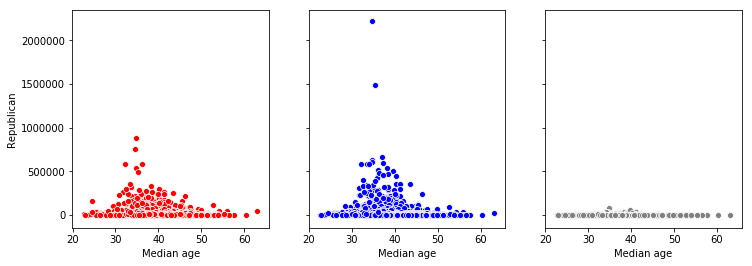

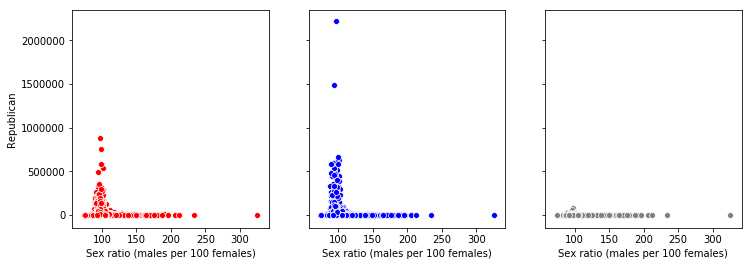

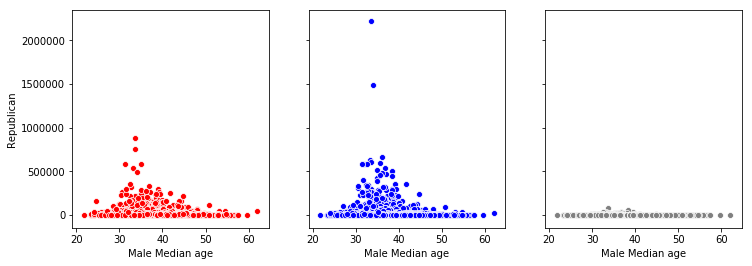

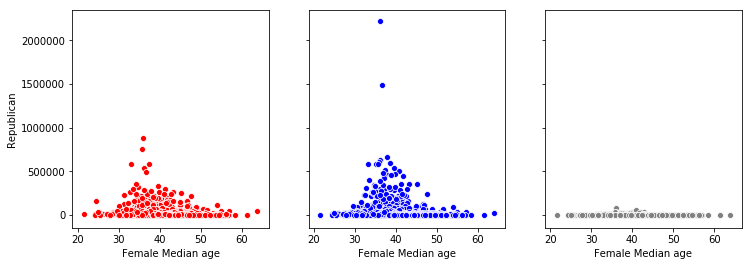

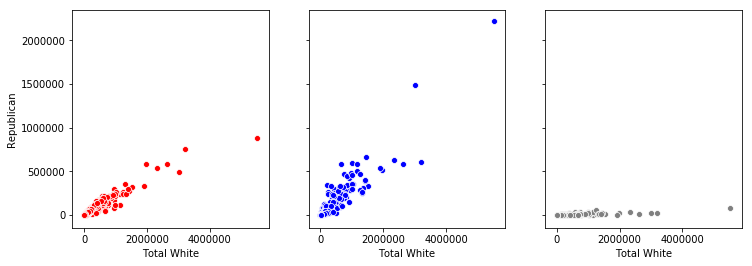

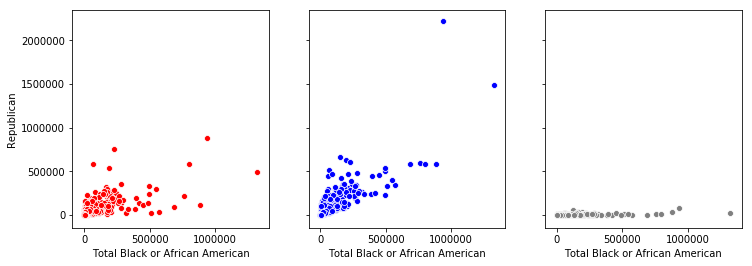

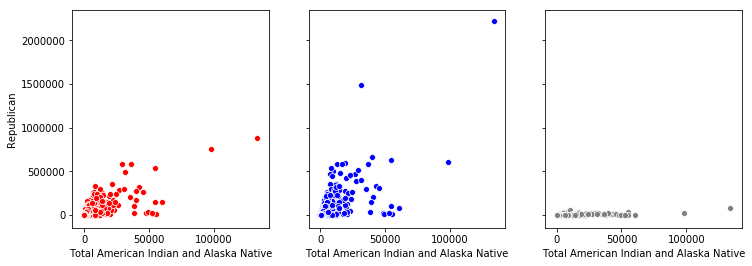

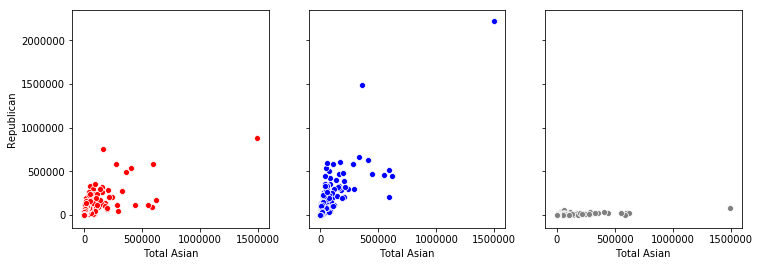

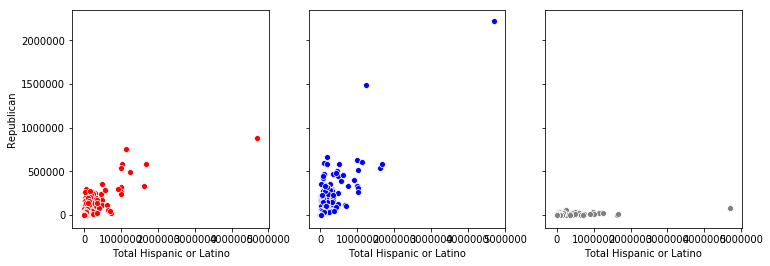

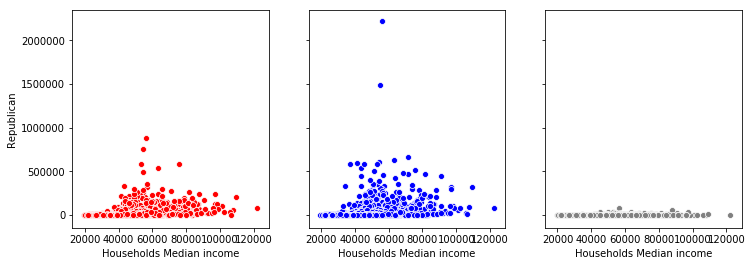

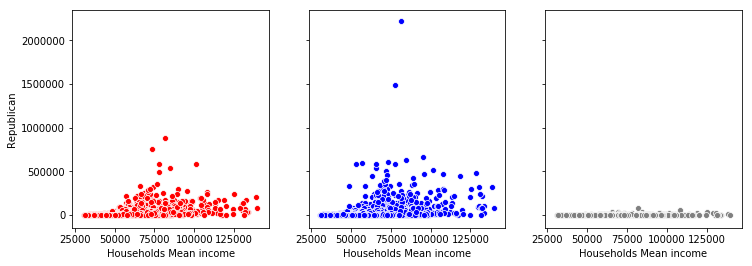

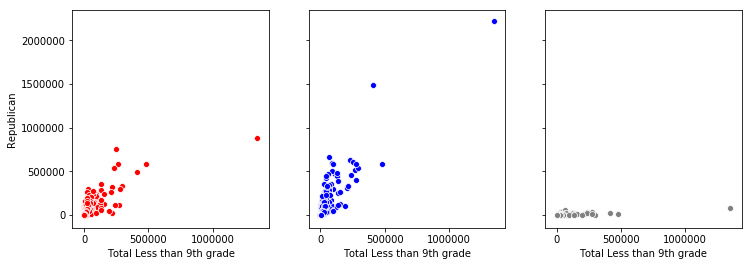

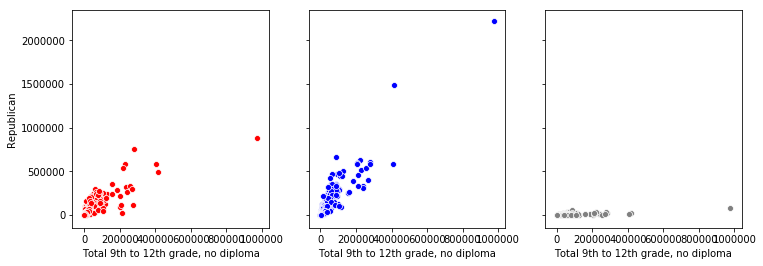

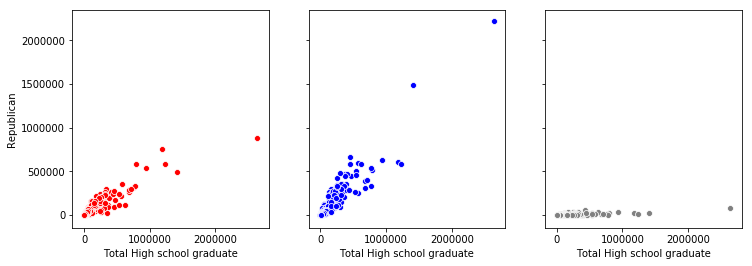

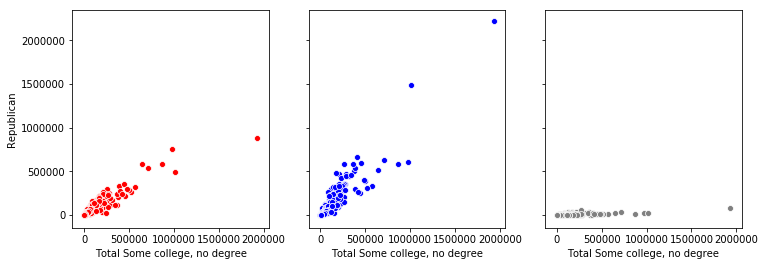

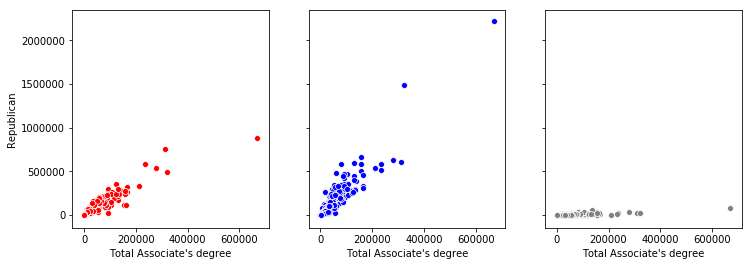

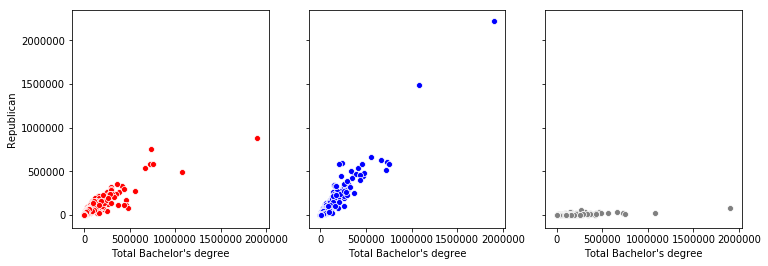

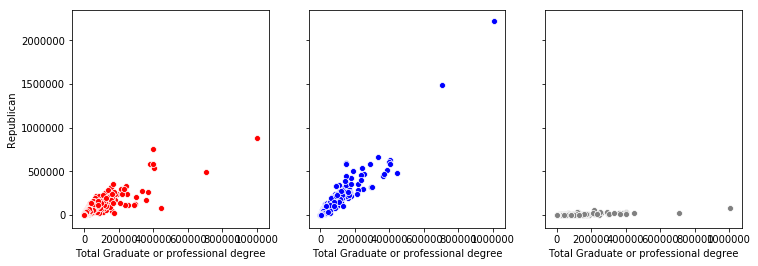

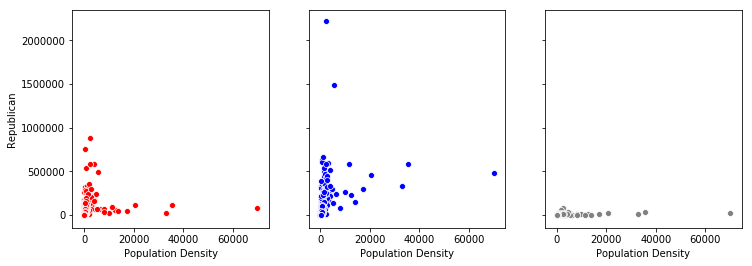

In [6]:
for feature in COUNT_FEATURES:
    f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4))  
    sns.scatterplot(feature, 'Republican', data=df_2012, color='red', ax=axes[0])
    sns.scatterplot(feature, 'Democrat', data=df_2012, color='blue', ax=axes[1])
    sns.scatterplot(feature, 'Third', data=df_2012, color='gray', ax=axes[2])
    plt.plot();  

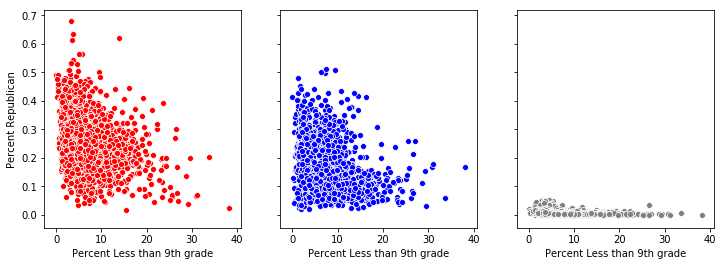

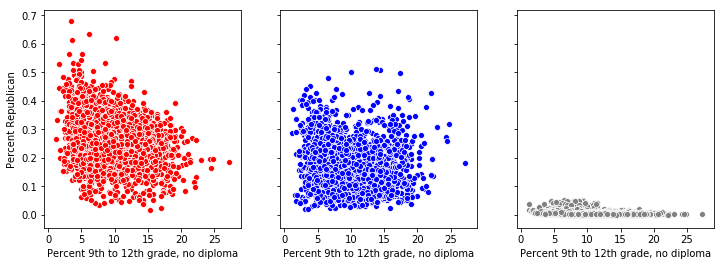

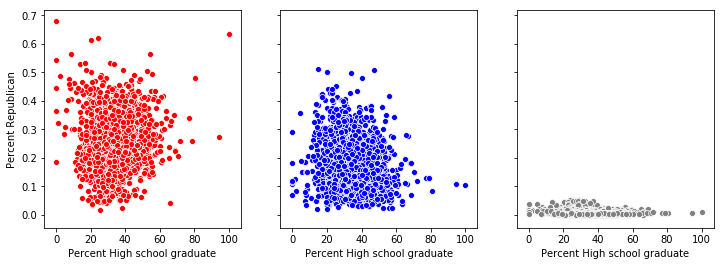

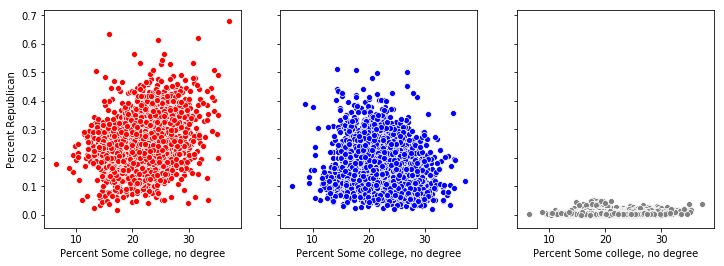

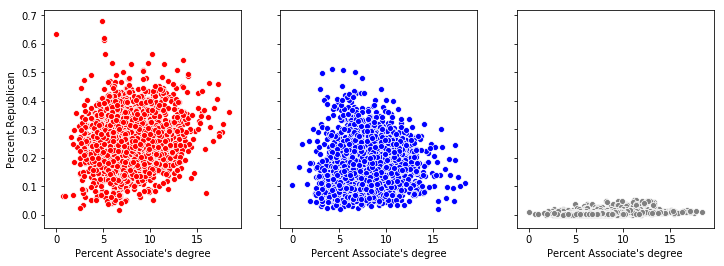

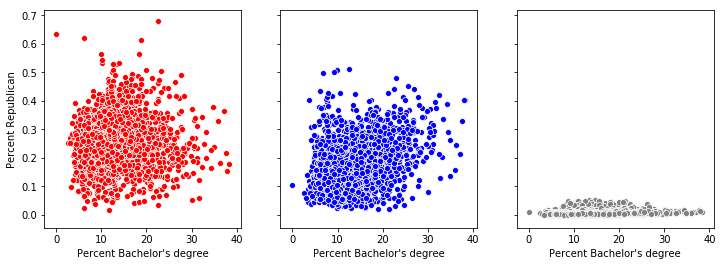

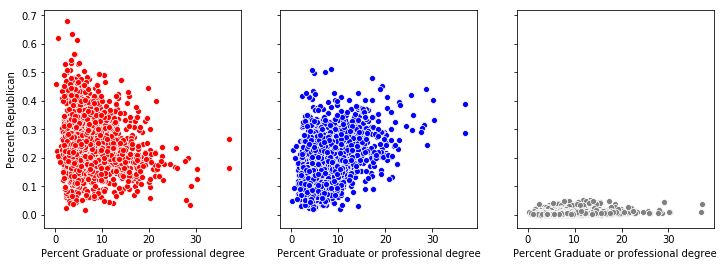

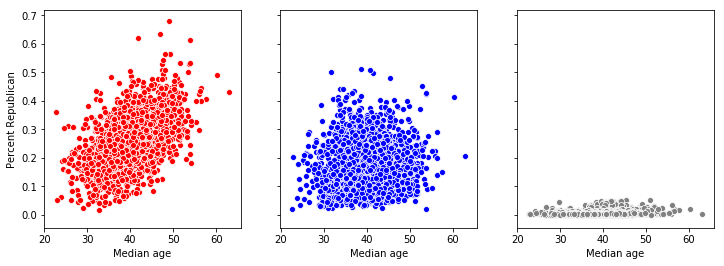

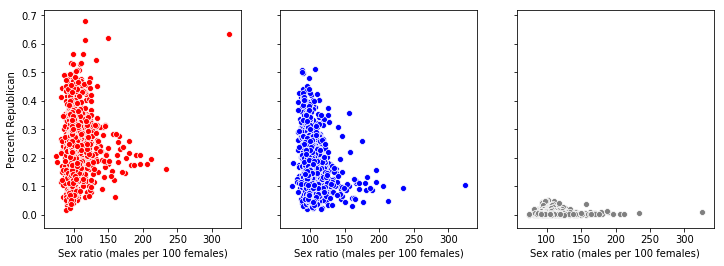

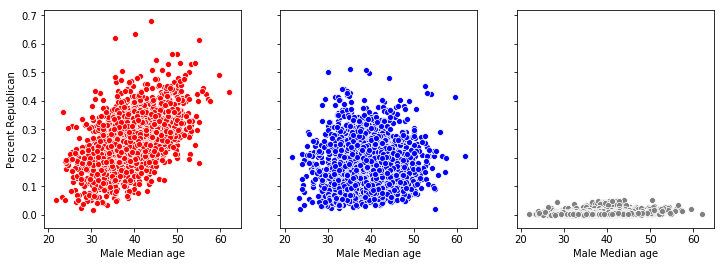

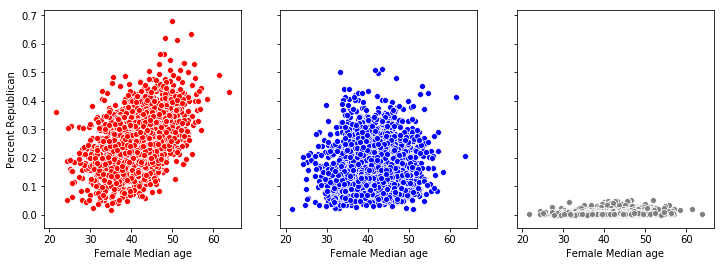

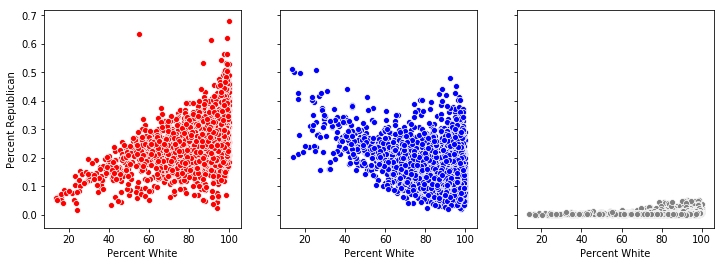

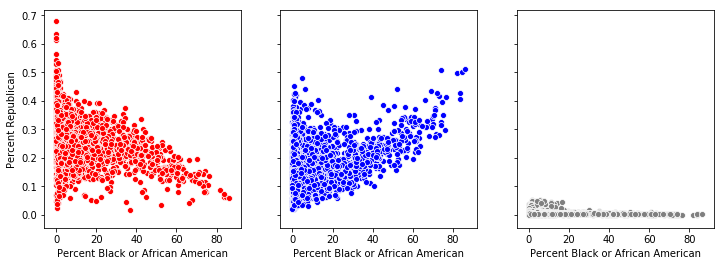

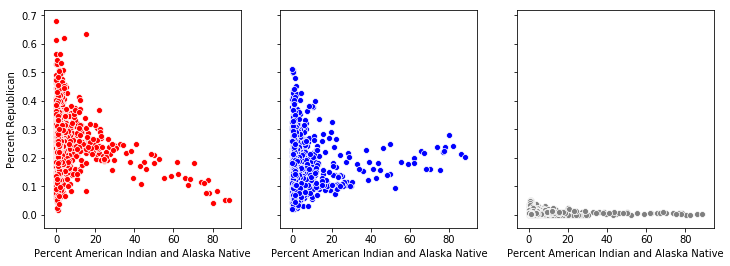

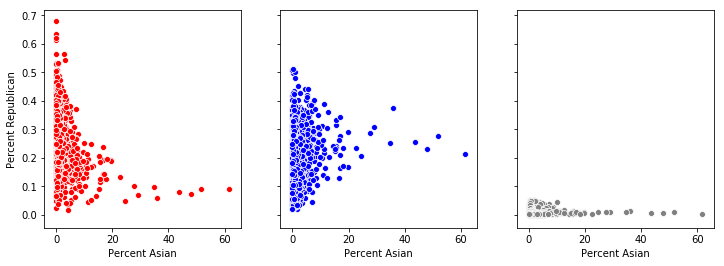

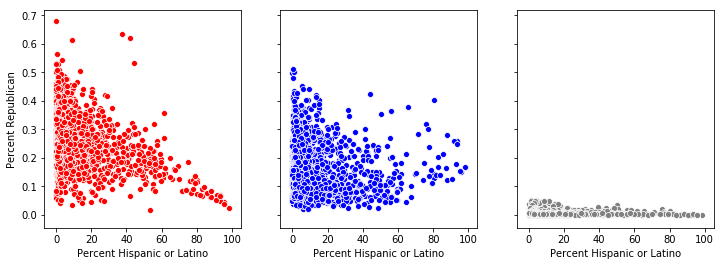

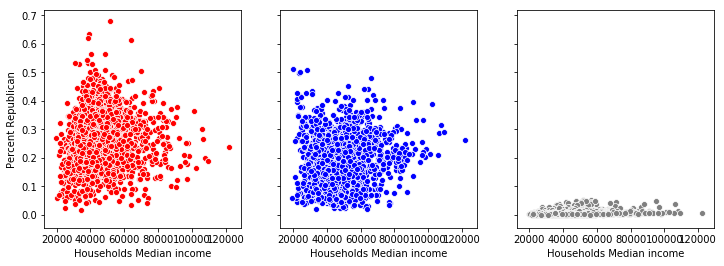

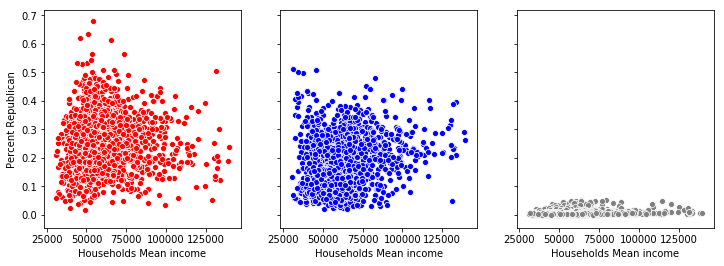

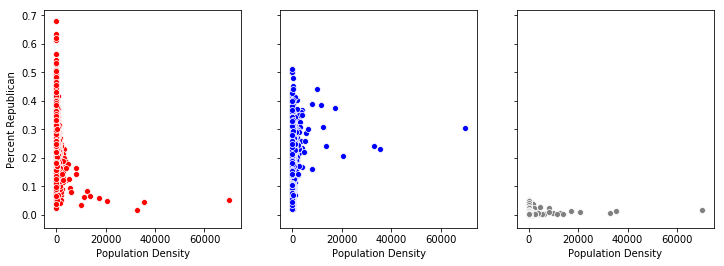

In [7]:
for feature in PERCENT_FEATURES:
    f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4))  
    sns.scatterplot(feature, 'Percent Republican', data=df_2012, color='red', ax=axes[0])
    sns.scatterplot(feature, 'Percent Democrat', data=df_2012, color='blue', ax=axes[1])
    sns.scatterplot(feature, 'Percent Third', data=df_2012, color='gray', ax=axes[2])
    plt.plot();    

In [8]:
df_2016.corr()

,Total Less than 9th grade,"Total 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree,Percent Less than 9th grade,"Percent 9th to 12th grade, no diploma",Percent High school graduate,"Percent Some college, no degree",Percent Associate's degree,Percent Bachelor's degree,Percent Graduate or professional degree,Total population,Median age,Sex ratio (males per 100 females),Male Median age,Female Median age,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Hispanic or Latino,Households Median income,Households Mean income,Size,Population Density,Republican,Democrat,Third,Percent Republican,Percent Democrat,Percent Third
Total Less than 9th grade,1.000000,0.962281,0.881037,0.894025,0.869435,0.869502,0.805752,0.113839,-0.016308,-0.200922,-0.065127,-0.059229,0.144579,0.160119,0.919006,-0.134335,-0.054132,-0.131453,-0.135768,0.854413,0.678057,0.509097,0.855641,0.975289,-0.158696,0.048551,-0.024015,0.363096,0.218473,0.121460,0.174350,0.114142,0.296285,0.707478,0.878606,0.766364,-0.238770,0.155258,-0.036035
"Total 9th to 12th grade, no diploma",0.962281,1.000000,0.963491,0.959053,0.939579,0.912647,0.856332,0.067890,-0.027630,-0.241448,-0.065208,-0.057863,0.191658,0.218530,0.970900,-0.166051,-0.085701,-0.164545,-0.166635,0.925166,0.790899,0.537419,0.815999,0.937750,-0.202884,0.093512,-0.034411,0.399300,0.206753,0.148225,0.208759,0.124894,0.341876,0.822438,0.928826,0.822125,-0.290080,0.217483,-0.041405
Total High school graduate,0.881037,0.963491,1.000000,0.973735,0.976163,0.937900,0.896261,0.001592,-0.100700,-0.277476,-0.086661,-0.037038,0.273428,0.304506,0.980755,-0.172712,-0.111459,-0.172251,-0.173778,0.966622,0.815384,0.518575,0.769618,0.856408,-0.197454,0.085971,-0.048859,0.461340,0.178826,0.234121,0.295740,0.101461,0.333564,0.912031,0.947550,0.854936,-0.314442,0.283713,-0.015099
"Total Some college, no degree",0.894025,0.959053,0.973735,1.000000,0.983471,0.956115,0.905339,0.003389,-0.113314,-0.323707,-0.027143,-0.028455,0.292475,0.307520,0.989611,-0.181549,-0.096807,-0.178407,-0.184130,0.978213,0.761449,0.570357,0.805011,0.881482,-0.195033,0.071791,-0.040137,0.475474,0.192148,0.244039,0.304864,0.136652,0.272488,0.917913,0.947552,0.914500,-0.307090,0.273157,0.023240
Total Associate's degree,0.869435,0.939579,0.976163,0.983471,1.000000,0.957658,0.912641,-0.016832,-0.136817,-0.330655,-0.057186,0.010608,0.314620,0.332861,0.981592,-0.172978,-0.104102,-0.171352,-0.174949,0.977750,0.744585,0.541957,0.805321,0.855016,-0.185817,0.061881,-0.045091,0.501710,0.178285,0.269193,0.328643,0.116862,0.290593,0.929405,0.949514,0.907742,-0.307829,0.297998,0.031443
Total Bachelor's degree,0.869502,0.912647,0.937900,0.956115,0.957658,1.000000,0.979496,-0.010372,-0.148365,-0.354302,-0.099875,-0.050914,0.363017,0.391380,0.977460,-0.167214,-0.094497,-0.163065,-0.171281,0.958058,0.757074,0.505521,0.858252,0.835279,-0.194639,0.065607,-0.042447,0.552654,0.166214,0.309912,0.385745,0.071055,0.385830,0.880678,0.977359,0.908206,-0.306519,0.312904,0.032816
Total Graduate or professional degree,0.805752,0.856332,0.896261,0.905339,0.912641,0.979496,1.000000,-0.016508,-0.156066,-0.367025,-0.131431,-0.066453,0.374925,0.448982,0.939151,-0.162295,-0.097390,-0.158781,-0.165977,0.921802,0.748110,0.468185,0.830003,0.766254,-0.202222,0.071408,-0.043050,0.579182,0.154880,0.334184,0.419039,0.055490,0.445342,0.842845,0.962671,0.875786,-0.319707,0.339957,0.030557
Percent Less than 9th grade,0.113839,0.067890,0.001592,0.003389,-0.016832,-0.010372,-0.016508,1.000000,0.564338,0.027036,-0.302020,-0.452640,-0.436039,-0.325293,0.016812,-0.234258,0.104447,-0.239316,-0.211676,-0.007957,0.020988,0.027022,0.043305,0.114028,-0.181063,0.134202,-0.038178,-0.041280,0.576469,-0.355650,-0.3053

In [9]:
df_2016.head()

,County,State,Total Less than 9th grade,"Total 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree,Percent Less than 9th grade,"Percent 9th to 12th grade, no diploma",Percent High school graduate,"Percent Some college, no degree",Percent Associate's degree,Percent Bachelor's degree,Percent Graduate or professional degree,Total population,Median age,Sex ratio (males per 100 females),Male Median age,...,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Hispanic or Latino,Households Median income,Households Mean income,Size,Population Density,Republican,Democrat,Third,Percent Republican,Percent Democrat,Percent Third
0,"Wilcox County, Alabama, 2016",Alabama,471,1028,3342,1292,467,545,296,6.3,13.8,44.9,17.4,6.3,7.3,4.0,11119,40.2,93.1,38.3,...,3050,8000,7,0,62,27.4,71.9,0.1,0.0,0.6,24442,37636,888.50,12.514350,1737.0,4339.0,42.0,0.156219,0.390233,0.003777
1,"Winston County, Alabama, 2016",Alabama,1595,2550,5932,3512,1424,1387,874,9.2,14.8,34.3,20.3,8.2,8.0,5.1,24013,44.1,96.8,43.3,...,23191,98,166,84,700,96.6,0.4,0.7,0.3,2.9,33896,45481,612.98,39.174198,9228.0,872.0,213.0,0.384292,0.036314,0.008870
2,"Apache County, Arizona, 2016",Arizona,4933,4566,14622,11567,3141,3129,1699,11.3,10.5,33.5,26.5,7.2,7.2,3.9,72346,33.5,97.6,32.6,...,16307,361,52978,259,4303,22.5,0.5,73.2,0.4,5.9,32460,42584,11197.52,6.460895,8240.0,17083.0,2338.0,0.113897,0.236129,0.032317
3,"Cochise County, Arizona, 2016",Arizona,5492,6331,20470,25759,9696,13036,7387,6.2,7.2,23.2,29.2,11.0,14.8,8.4,128177,40.3,103.8,38.7,...,106136,5076,1496,2250,44097,82.8,4.0,1.2,1.8,34.4,45383,58772,6165.69,20.788752,28092.0,17450.0,4473.0,0.219166,0.136140,0.034897
4,"Coconino County, Arizona, 2016",Arizona,3375,5529,17352,19074,7515,16006,11471,4.2,6.9,21.6,23.7,9.4,19.9,14.3,138064,30.7,97.7,30.6,...,87335,2136,37054,2430,18930,63.3,1.5,26.8,1.8,13.7,51106,69267,18618.89,7.415265,21108.0,32404.0,6272.0,0.152886,0.234703,0.045428


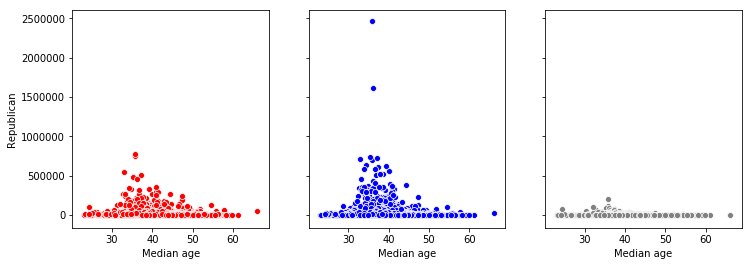

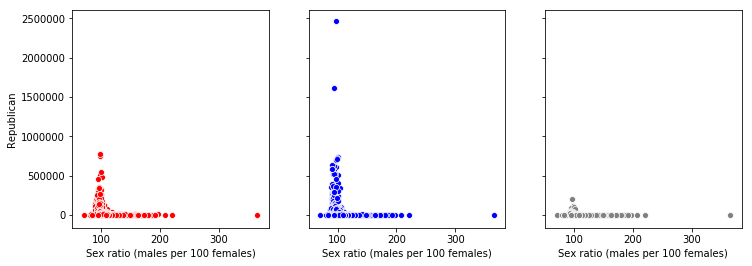

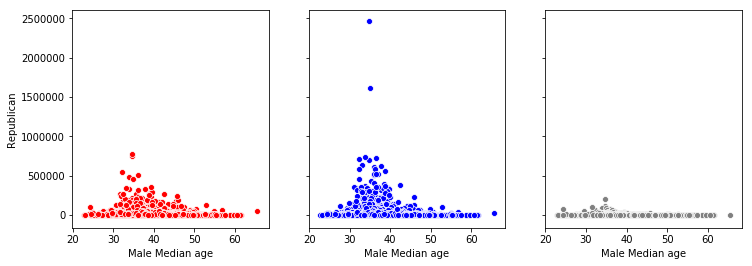

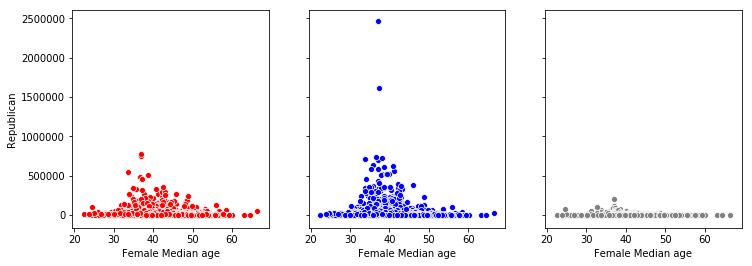

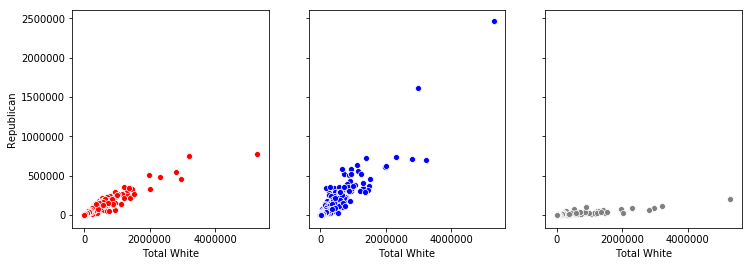

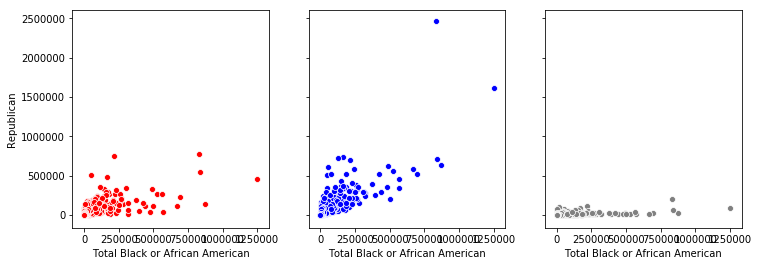

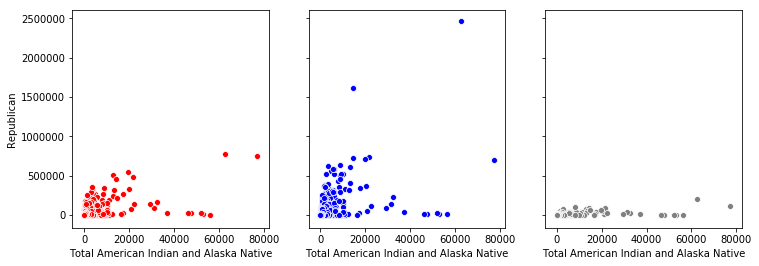

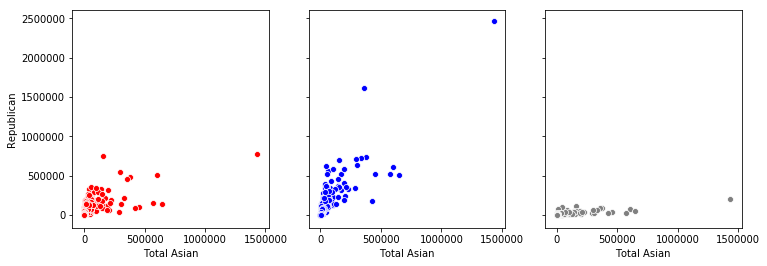

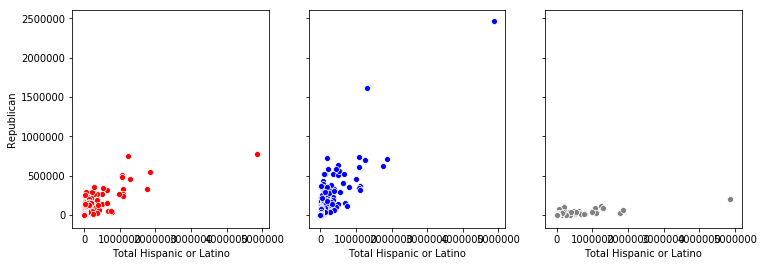

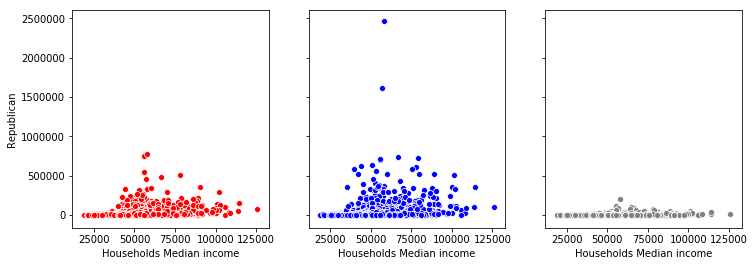

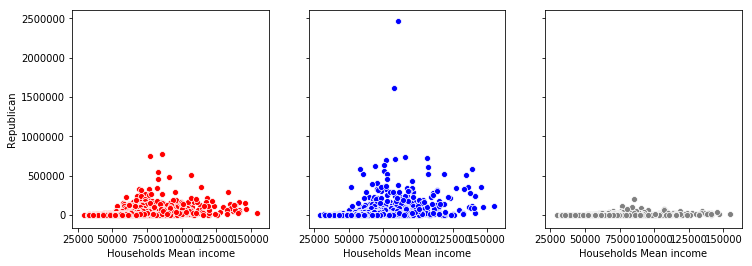

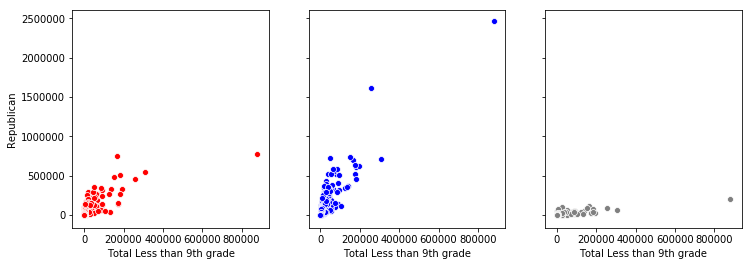

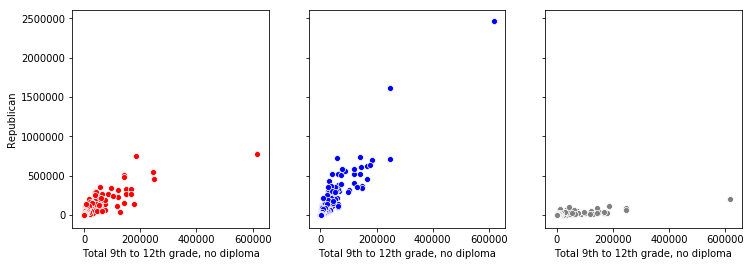

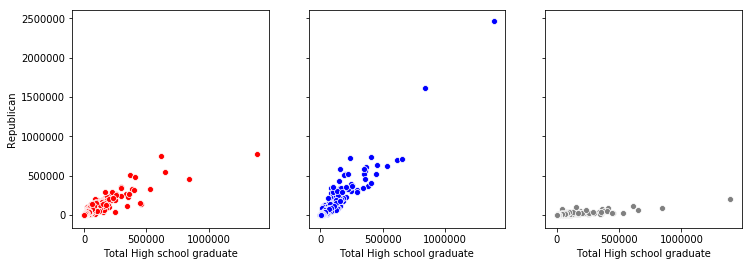

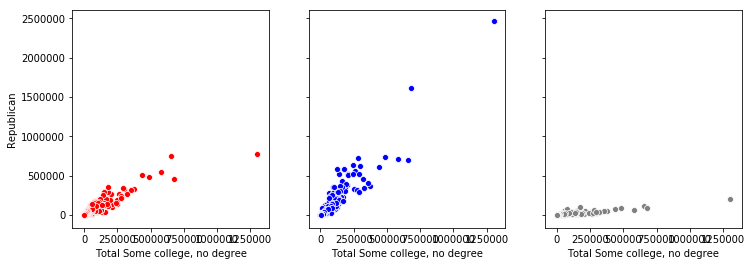

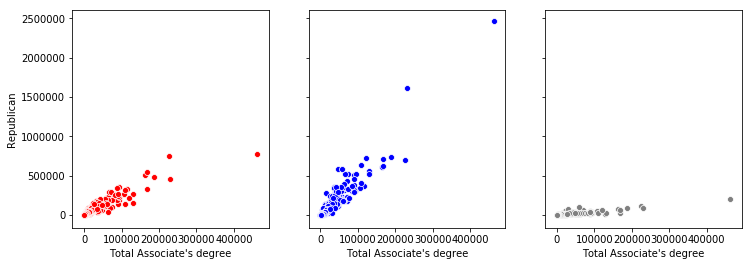

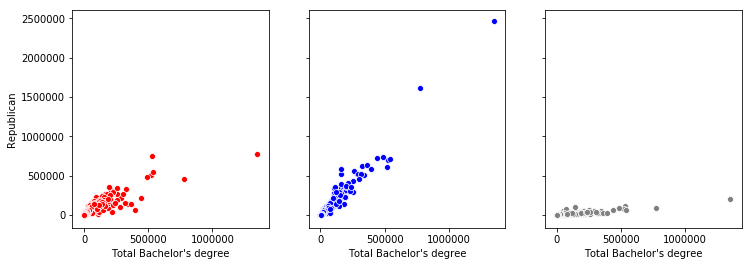

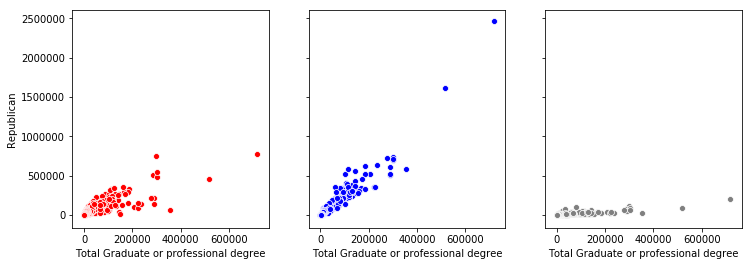

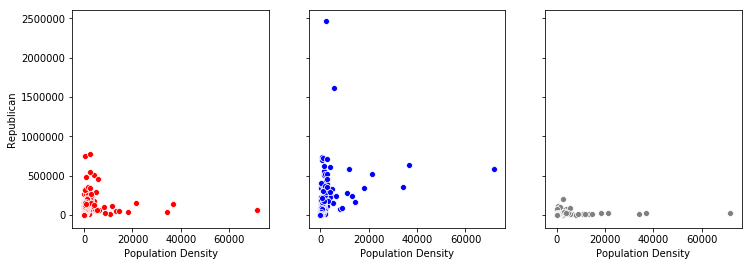

In [10]:
for feature in COUNT_FEATURES:
    f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4))  
    sns.scatterplot(feature, 'Republican', data=df_2016, color='red', ax=axes[0])
    sns.scatterplot(feature, 'Democrat', data=df_2016, color='blue', ax=axes[1])
    sns.scatterplot(feature, 'Third', data=df_2016, color='gray', ax=axes[2])
    plt.plot();  

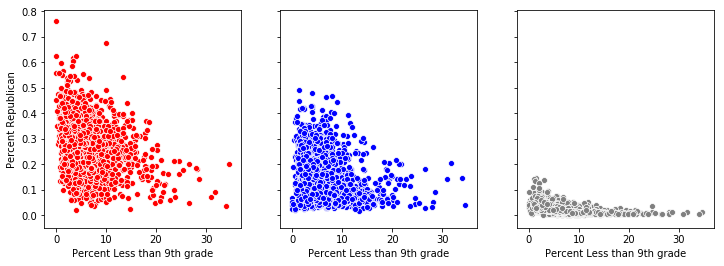

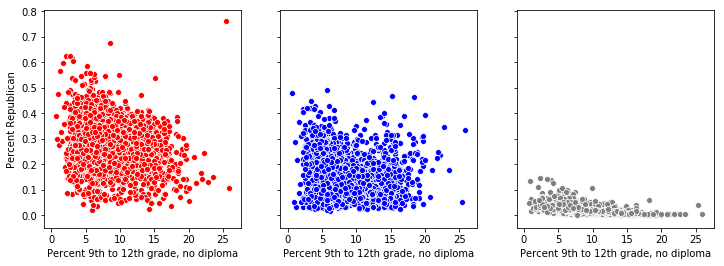

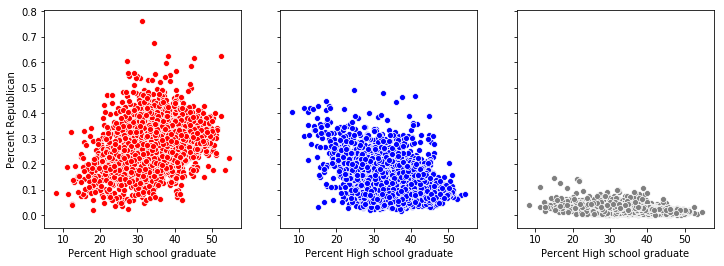

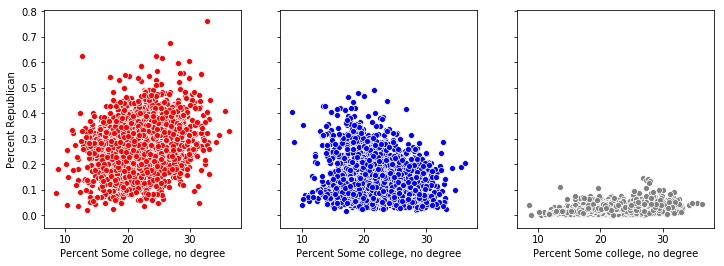

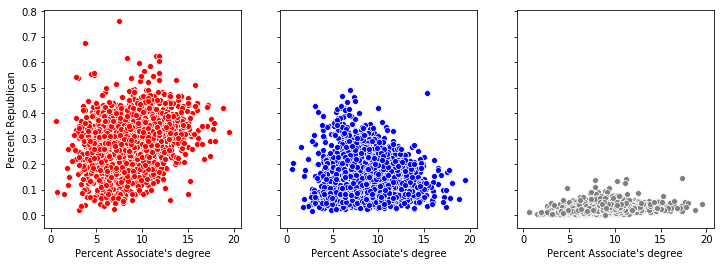

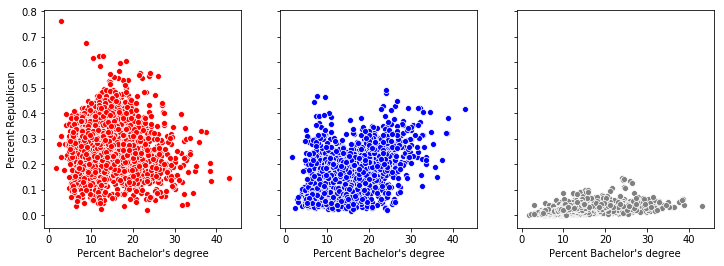

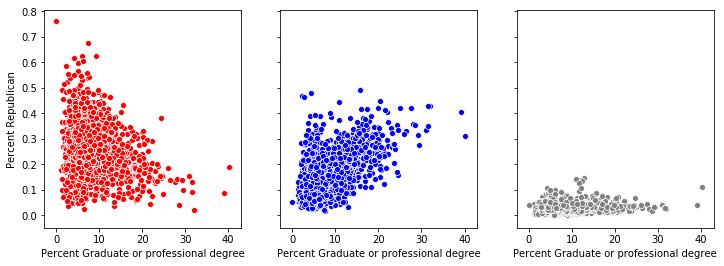

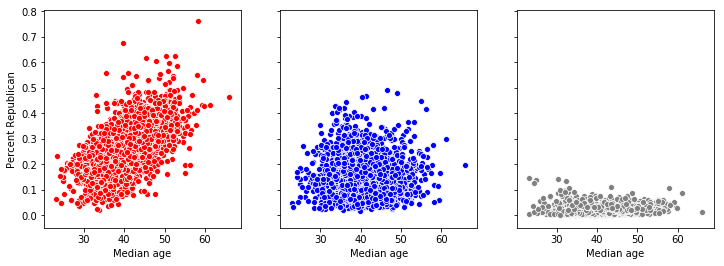

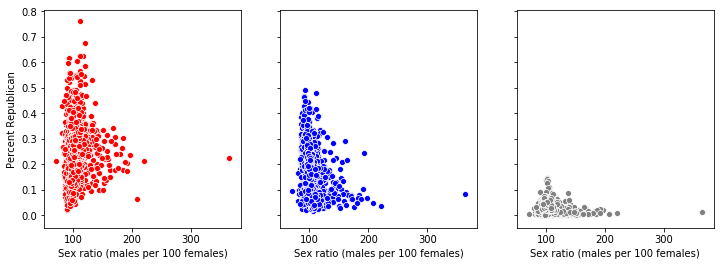

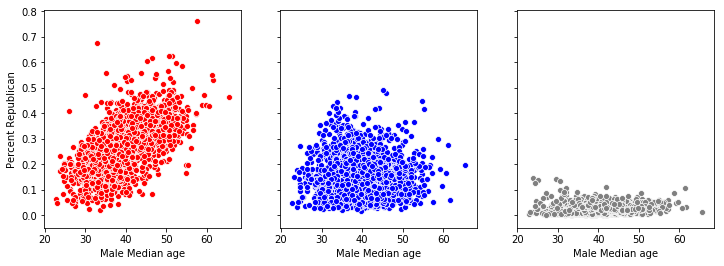

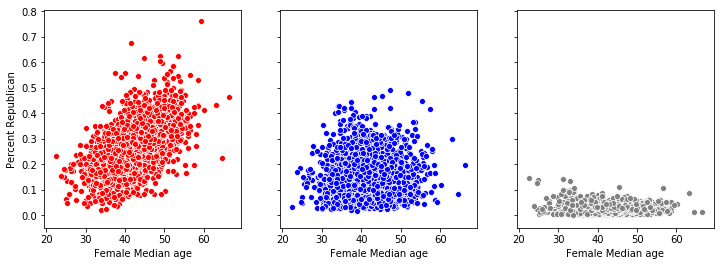

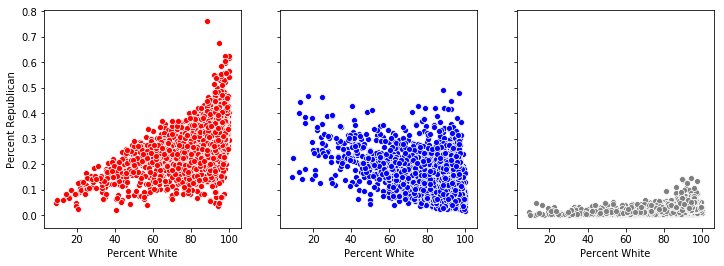

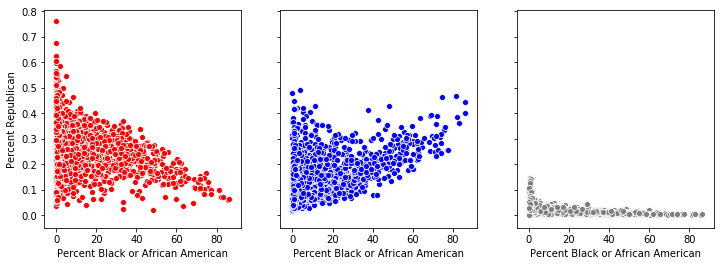

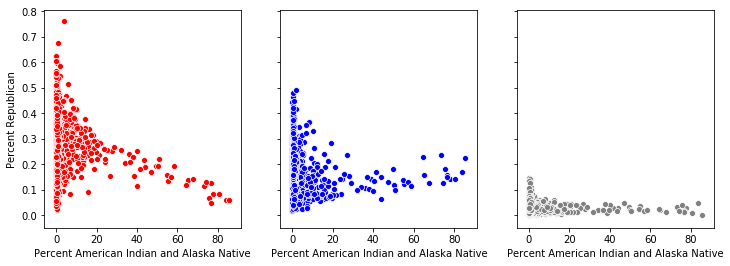

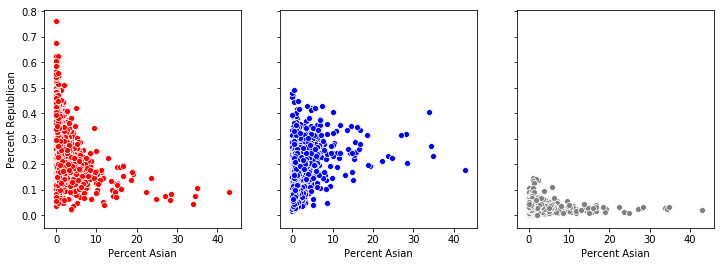

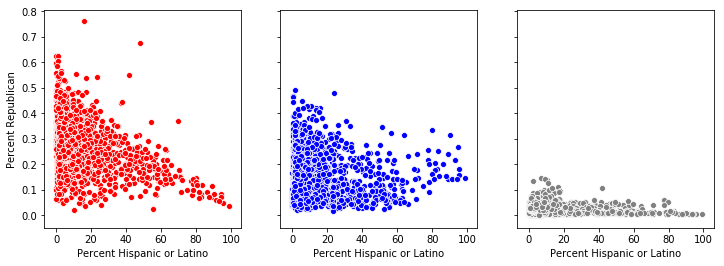

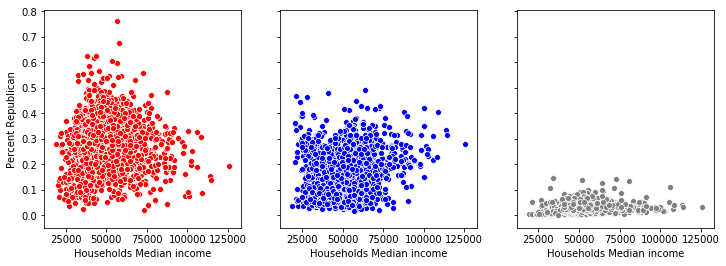

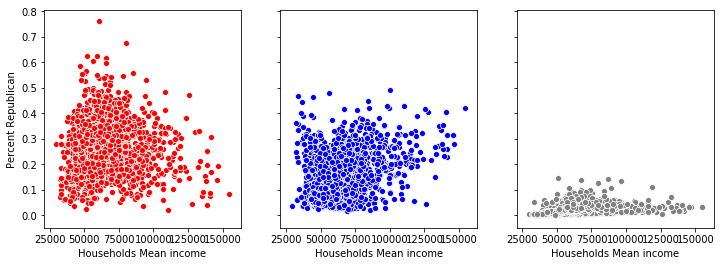

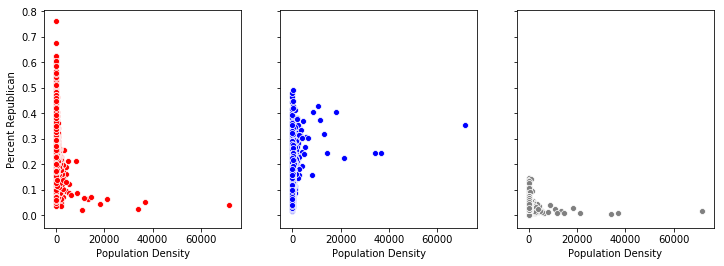

In [11]:
for feature in PERCENT_FEATURES:
    f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4))  
    sns.scatterplot(feature, 'Percent Republican', data=df_2016, color='red', ax=axes[0])
    sns.scatterplot(feature, 'Percent Democrat', data=df_2016, color='blue', ax=axes[1])
    sns.scatterplot(feature, 'Percent Third', data=df_2016, color='gray', ax=axes[2])
    plt.plot(); 